### Exercice:

Scraping weather forecase from the The Weather Channel website `weather.com` using `requests` and `BeautifulSoup` libraries.

1. Implement a scraping script for getting 10 days weather forecasts of Benguerir city and Tanger City.
2. Store the data sets into Pandas DataFrame.
3. Use matplotlib library to plot the raining days of the two cities in the same figure.  


# Import libriaries : 

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bs

## requests Benguerir data from Weather.com

In [73]:
id_Tanger = "701d5f2dd2a2b8cabcc505d69649a291257de6c1369a982396ea546ccb99198c"
id_Benguerir = "f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111"

## Forcasting Weather of Benguerir City :

In [76]:
Forcast_Benguerir_request = requests.get("https://weather.com/fr-MA/temps/10jours/l/f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111")
Forcast_content = bs(Forcast_Benguerir_request.content, 'lxml')
type(Forcast_content)
Forcast_Benguerir = Forcast_content.find('div', id = "WxuDailyCard-main-a43097e1-49d7-4df7-9d1a-334b29628263")
Forcast_Benguerir_summaries = Forcast_Benguerir.find_all('summary')

### Extract data  from summary :

In [77]:
def get_summary_info(summary):
    df = [] 
    a = summary.find('h3')
    if  a != None:
        if a.get_text() not in df:
             df.append(a.get_text())
                
    for i in summary.find('div').find_all('div'):
        c = i.find_all('span')
        for span in c:
            df.append(span.get_text())
            
        break
    return df

In [78]:
df = [get_summary_info(Forcast_Benguerir_summaries[b]) for b in range(1,15)]
df

[['mer. 18',
  '15°',
  '/5°',
  '5°',
  'Averses dans la matinée',
  '80%',
  'NNO 20 km/h'],
 ['jeu. 19', '17°', '/2°', '2°', 'Ensoleillé', '14%', 'NE 24 km/h'],
 ['ven. 20', '17°', '/4°', '4°', 'Ensoleillé', '8%', 'NE 16 km/h'],
 ['sam. 21', '20°', '/6°', '6°', 'Ensoleillé', '12%', 'NE 17 km/h'],
 ['dim. 22', '20°', '/4°', '4°', 'Peu nuageux', '15%', 'NE 17 km/h'],
 ['lun. 23', '19°', '/3°', '3°', 'Ensoleillé', '14%', 'NE 14 km/h'],
 ['mar. 24', '19°', '/2°', '2°', 'Ensoleillé', '8%', 'NE 13 km/h'],
 ['mer. 25', '19°', '/3°', '3°', 'Ensoleillé', '5%', 'NE 13 km/h'],
 ['jeu. 26', '19°', '/4°', '4°', 'Plutôt ensoleillé', '2%', 'ENE 13 km/h'],
 ['ven. 27', '20°', '/5°', '5°', 'Peu nuageux', '2%', 'ENE 14 km/h'],
 ['sam. 28', '20°', '/6°', '6°', 'Peu nuageux', '2%', 'NE 14 km/h'],
 ['dim. 29', '20°', '/6°', '6°', 'Peu nuageux', '3%', 'ENE 14 km/h'],
 ['lun. 30', '21°', '/6°', '6°', 'Peu nuageux', '4%', 'ENE 17 km/h'],
 ['mar. 31', '21°', '/6°', '6°', 'Peu nuageux', '11%', 'ENE 17 km/h']

### Create  Benguerir DataFrame :

In [79]:
columns = ['Day', 'Max_Temperature', 'Min_Temperature1', 
           'Min_Temperature', 'State', 'Percentage_Value', 'Wind_Speed']
Benguerir_data = pd.DataFrame(data=df, columns = columns)
Benguerir_data

,Day,Max_Temperature,Min_Temperature1,Min_Temperature,State,Percentage_Value,Wind_Speed
0,mer. 18,15°,/5°,5°,Averses dans la matinée,80%,NNO 20 km/h
1,jeu. 19,17°,/2°,2°,Ensoleillé,14%,NE 24 km/h
2,ven. 20,17°,/4°,4°,Ensoleillé,8%,NE 16 km/h
3,sam. 21,20°,/6°,6°,Ensoleillé,12%,NE 17 km/h
4,dim. 22,20°,/4°,4°,Peu nuageux,15%,NE 17 km/h
5,lun. 23,19°,/3°,3°,Ensoleillé,14%,NE 14 km/h
6,mar. 24,19°,/2°,2°,Ensoleillé,8%,NE 13 km/h
7,mer. 25,19°,/3°,3°,Ensoleillé,5%,NE 13 km/h
8,jeu. 26,19°,/4°,4°,Plutôt ensoleillé,2%,ENE 13 km/h
9,ven. 27,20°,/5°,5°,Peu nuageux,2%,ENE 14 km/h


###  Clean Benguerir DataFrame : 

In [80]:
# Delete repetition
del(Benguerir_data["Min_Temperature1"])
Benguerir_data

,Day,Max_Temperature,Min_Temperature,State,Percentage_Value,Wind_Speed
0,mer. 18,15°,5°,Averses dans la matinée,80%,NNO 20 km/h
1,jeu. 19,17°,2°,Ensoleillé,14%,NE 24 km/h
2,ven. 20,17°,4°,Ensoleillé,8%,NE 16 km/h
3,sam. 21,20°,6°,Ensoleillé,12%,NE 17 km/h
4,dim. 22,20°,4°,Peu nuageux,15%,NE 17 km/h
5,lun. 23,19°,3°,Ensoleillé,14%,NE 14 km/h
6,mar. 24,19°,2°,Ensoleillé,8%,NE 13 km/h
7,mer. 25,19°,3°,Ensoleillé,5%,NE 13 km/h
8,jeu. 26,19°,4°,Plutôt ensoleillé,2%,ENE 13 km/h
9,ven. 27,20°,5°,Peu nuageux,2%,ENE 14 km/h


## requests Tanger data from Weather.com


In [81]:
Forcast_Tanger_request = requests.get("https://weather.com/fr-MA/temps/10jours/l/701d5f2dd2a2b8cabcc505d69649a291257de6c1369a982396ea546ccb99198c")
Forcast_content = bs(Forcast_Tanger_request.content, 'lxml')
type(Forcast_content)
Forcast_Tanger = Forcast_content.find('div', id = "WxuDailyCard-main-a43097e1-49d7-4df7-9d1a-334b29628263")
Forcast_Tanger_summaries = Forcast_Tanger.find_all('summary')

### Extract data  from summary :

In [82]:
df_1 = [get_summary_info(Forcast_Tanger_summaries[b]) for b in range(1,15)]
df_1

[['mer. 18',
  '14°',
  '/7°',
  '7°',
  'Averses dans la matinée',
  '62%',
  'NO 30 km/h'],
 ['jeu. 19', '14°', '/10°', '10°', 'Ensoleillé', '7%', 'NO 13 km/h'],
 ['ven. 20', '16°', '/12°', '12°', 'Averses', '64%', 'OSO 19 km/h'],
 ['sam. 21',
  '16°',
  '/9°',
  '9°',
  'Averses dans la matinée',
  '36%',
  'O 12 km/h'],
 ['dim. 22', '17°', '/11°', '11°', 'Ensoleillé', '10%', 'ENE 17 km/h'],
 ['lun. 23', '15°', '/6°', '6°', 'Ensoleillé', '5%', 'ENE 20 km/h'],
 ['mar. 24', '16°', '/9°', '9°', 'Ensoleillé', '5%', 'ENE 16 km/h'],
 ['mer. 25', '16°', '/10°', '10°', 'Ensoleillé', '5%', 'ENE 20 km/h'],
 ['jeu. 26', '16°', '/10°', '10°', 'Ensoleillé', '4%', 'E 17 km/h'],
 ['ven. 27', '17°', '/10°', '10°', 'Plutôt ensoleillé', '13%', 'E 18 km/h'],
 ['sam. 28', '17°', '/11°', '11°', 'Peu nuageux', '24%', 'E 21 km/h'],
 ['dim. 29', '17°', '/11°', '11°', 'Peu nuageux', '24%', 'E 22 km/h'],
 ['lun. 30', '17°', '/12°', '12°', 'Peu nuageux', '23%', 'ESE 18 km/h'],
 ['mar. 31', '17°', '/12°', '12°

### Create  Tanger DataFrame :

In [83]:
Tanger_data = pd.DataFrame(data=df_1, columns = columns)
Tanger_data

,Day,Max_Temperature,Min_Temperature1,Min_Temperature,State,Percentage_Value,Wind_Speed
0,mer. 18,14°,/7°,7°,Averses dans la matinée,62%,NO 30 km/h
1,jeu. 19,14°,/10°,10°,Ensoleillé,7%,NO 13 km/h
2,ven. 20,16°,/12°,12°,Averses,64%,OSO 19 km/h
3,sam. 21,16°,/9°,9°,Averses dans la matinée,36%,O 12 km/h
4,dim. 22,17°,/11°,11°,Ensoleillé,10%,ENE 17 km/h
5,lun. 23,15°,/6°,6°,Ensoleillé,5%,ENE 20 km/h
6,mar. 24,16°,/9°,9°,Ensoleillé,5%,ENE 16 km/h
7,mer. 25,16°,/10°,10°,Ensoleillé,5%,ENE 20 km/h
8,jeu. 26,16°,/10°,10°,Ensoleillé,4%,E 17 km/h
9,ven. 27,17°,/10°,10°,Plutôt ensoleillé,13%,E 18 km/h


###  Tanger DataFrame : 

In [84]:
# Delete repetition
del(Tanger_data["Min_Temperature1"])
Tanger_data

,Day,Max_Temperature,Min_Temperature,State,Percentage_Value,Wind_Speed
0,mer. 18,14°,7°,Averses dans la matinée,62%,NO 30 km/h
1,jeu. 19,14°,10°,Ensoleillé,7%,NO 13 km/h
2,ven. 20,16°,12°,Averses,64%,OSO 19 km/h
3,sam. 21,16°,9°,Averses dans la matinée,36%,O 12 km/h
4,dim. 22,17°,11°,Ensoleillé,10%,ENE 17 km/h
5,lun. 23,15°,6°,Ensoleillé,5%,ENE 20 km/h
6,mar. 24,16°,9°,Ensoleillé,5%,ENE 16 km/h
7,mer. 25,16°,10°,Ensoleillé,5%,ENE 20 km/h
8,jeu. 26,16°,10°,Ensoleillé,4%,E 17 km/h
9,ven. 27,17°,10°,Plutôt ensoleillé,13%,E 18 km/h


### raining days data for Tanger City : 

In [85]:
L = []
for i in range(len(Tanger_data["Percentage_Value"])):
    L.append(Tanger_data["Percentage_Value"][i])


In [86]:
new_L = []
for i in L:
    new_L.append(i.replace('%', ''))

In [87]:
T = []
for i in range(len(new_L)):
    T.append(int(new_L[i]))

In [88]:
Tanger_data.insert(loc = 5,
          column='Int_Percentage_Value',
          value = T)

In [89]:
Tanger_data

,Day,Max_Temperature,Min_Temperature,State,Percentage_Value,Int_Percentage_Value,Wind_Speed
0,mer. 18,14°,7°,Averses dans la matinée,62%,62,NO 30 km/h
1,jeu. 19,14°,10°,Ensoleillé,7%,7,NO 13 km/h
2,ven. 20,16°,12°,Averses,64%,64,OSO 19 km/h
3,sam. 21,16°,9°,Averses dans la matinée,36%,36,O 12 km/h
4,dim. 22,17°,11°,Ensoleillé,10%,10,ENE 17 km/h
5,lun. 23,15°,6°,Ensoleillé,5%,5,ENE 20 km/h
6,mar. 24,16°,9°,Ensoleillé,5%,5,ENE 16 km/h
7,mer. 25,16°,10°,Ensoleillé,5%,5,ENE 20 km/h
8,jeu. 26,16°,10°,Ensoleillé,4%,4,E 17 km/h
9,ven. 27,17°,10°,Plutôt ensoleillé,13%,13,E 18 km/h


In [90]:
Tanger_data_possibilty_raining = Tanger_data.loc[Tanger_data["Int_Percentage_Value"] >= 10]

In [91]:
Tanger_data_possibilty_raining

,Day,Max_Temperature,Min_Temperature,State,Percentage_Value,Int_Percentage_Value,Wind_Speed
0,mer. 18,14°,7°,Averses dans la matinée,62%,62,NO 30 km/h
2,ven. 20,16°,12°,Averses,64%,64,OSO 19 km/h
3,sam. 21,16°,9°,Averses dans la matinée,36%,36,O 12 km/h
4,dim. 22,17°,11°,Ensoleillé,10%,10,ENE 17 km/h
9,ven. 27,17°,10°,Plutôt ensoleillé,13%,13,E 18 km/h
10,sam. 28,17°,11°,Peu nuageux,24%,24,E 21 km/h
11,dim. 29,17°,11°,Peu nuageux,24%,24,E 22 km/h
12,lun. 30,17°,12°,Peu nuageux,23%,23,ESE 18 km/h
13,mar. 31,17°,12°,Quelques averses,33%,33,SSE 19 km/h


### raining days data for BenguerirCity : 

In [92]:
L1 = []
for i in range(len(Benguerir_data["Percentage_Value"])):
    L1.append(Benguerir_data["Percentage_Value"][i])

In [93]:
new_L1 = []
for i in L1:
    new_L1.append(i.replace('%', ''))

In [94]:
B = []
for i in range(len(new_L1)):
    B.append(int(new_L1[i]))

In [95]:
Benguerir_data.insert(loc = 5,
          column='Int_Percentage_Value',
          value = B)

In [96]:
Benguerir_data

,Day,Max_Temperature,Min_Temperature,State,Percentage_Value,Int_Percentage_Value,Wind_Speed
0,mer. 18,15°,5°,Averses dans la matinée,80%,80,NNO 20 km/h
1,jeu. 19,17°,2°,Ensoleillé,14%,14,NE 24 km/h
2,ven. 20,17°,4°,Ensoleillé,8%,8,NE 16 km/h
3,sam. 21,20°,6°,Ensoleillé,12%,12,NE 17 km/h
4,dim. 22,20°,4°,Peu nuageux,15%,15,NE 17 km/h
5,lun. 23,19°,3°,Ensoleillé,14%,14,NE 14 km/h
6,mar. 24,19°,2°,Ensoleillé,8%,8,NE 13 km/h
7,mer. 25,19°,3°,Ensoleillé,5%,5,NE 13 km/h
8,jeu. 26,19°,4°,Plutôt ensoleillé,2%,2,ENE 13 km/h
9,ven. 27,20°,5°,Peu nuageux,2%,2,ENE 14 km/h


In [97]:
Benguerir_data_possibilty_raining = Benguerir_data.loc[Benguerir_data["Int_Percentage_Value"] >= 10]

In [98]:
Benguerir_data_possibilty_raining

,Day,Max_Temperature,Min_Temperature,State,Percentage_Value,Int_Percentage_Value,Wind_Speed
0,mer. 18,15°,5°,Averses dans la matinée,80%,80,NNO 20 km/h
1,jeu. 19,17°,2°,Ensoleillé,14%,14,NE 24 km/h
3,sam. 21,20°,6°,Ensoleillé,12%,12,NE 17 km/h
4,dim. 22,20°,4°,Peu nuageux,15%,15,NE 17 km/h
5,lun. 23,19°,3°,Ensoleillé,14%,14,NE 14 km/h
13,mar. 31,21°,6°,Peu nuageux,11%,11,ENE 17 km/h


### Merge the Tanger and Benguerir Data  : 

In [99]:
tng_beng_data = [Benguerir_data, Tanger_data]
result = pd.concat(tng_beng_data, keys = ["Benguerir", "Tanger"])
result

Day Max_Temperature Min_Temperature  \
Benguerir 0   mer. 18             15°              5°   
          1   jeu. 19             17°              2°   
          2   ven. 20             17°              4°   
          3   sam. 21             20°              6°   
          4   dim. 22             20°              4°   
          5   lun. 23             19°              3°   
          6   mar. 24             19°              2°   
          7   mer. 25             19°              3°   
          8   jeu. 26             19°              4°   
          9   ven. 27             20°              5°   
          10  sam. 28             20°              6°   
          11  dim. 29             20°              6°   
          12  lun. 30             21°              6°   
          13  mar. 31             21°              6°   
Tanger    0   mer. 18             14°              7°   
          1   jeu. 19             14°             10°   
          2   ven. 20             16°             12°   
          3   sam. 21             16°              9°   
          4   dim. 22             17°             11°   
          5   lun. 23             15°              6°   
          6   mar. 24             16°              9°   
          7   mer. 25             16°             10°   
          8   jeu. 26             16°             10°   
          9   ven. 27             17°             10°   
          10  sam. 28             17°             11°   
          11  dim. 29             17°             11°   
          12  lun. 30             17°             12°   
          13  mar. 31             17°             12°   

                                State Percentage_Value  Int_Percentage_Value  \
Benguerir 0   Averses dans la matinée              80%                    80   
          1                Ensoleillé              14%                    14   
          2                Ensoleillé               8%                     8   
          3                Ensoleillé              12%                    12   
          4               Peu nuageux              15%                    15   
          5                Ensoleillé              14%                    14   
          6                Ensoleillé               8%                     8   
          7                Ensoleillé               5%                     5   
          8         Plutôt ensoleillé               2%                     2   
          9               Peu nuageux               2%                     2   
          10              Peu nuageux               2%                     2   
          11              Peu nuageux               3%                     3   
          12              Peu nuageux               4%                     4   
          13              Peu nuageux              11%                    11   
Tanger    0   Averses dans la matinée              62%                    62   
          1                Ensoleillé               7%                     7   
          2                   Averses              64%                    64   
          3   Averses dans la matinée              36%                    36   
          4                Ensoleillé              10%                    10   
          5                Ensoleillé               5%                     5   
          6                Ensoleillé               5%                     5   
          7                Ensoleillé               5%                     5   
          8                Ensoleillé               4%                     4   
          9         Plutôt ensoleillé              13%                    13   
          10              Peu nuageux              24%                    24   
          11              Peu nuageux              24%                    24   
          12              Peu nuageux              23%                    23   
          13         Quelques averses              33%                    33   

               Wind_Speed  
Benguerir 0   N

### plot the raining days of the two cities in the same figure

In [100]:
import warnings
warnings.filterwarnings("ignore")

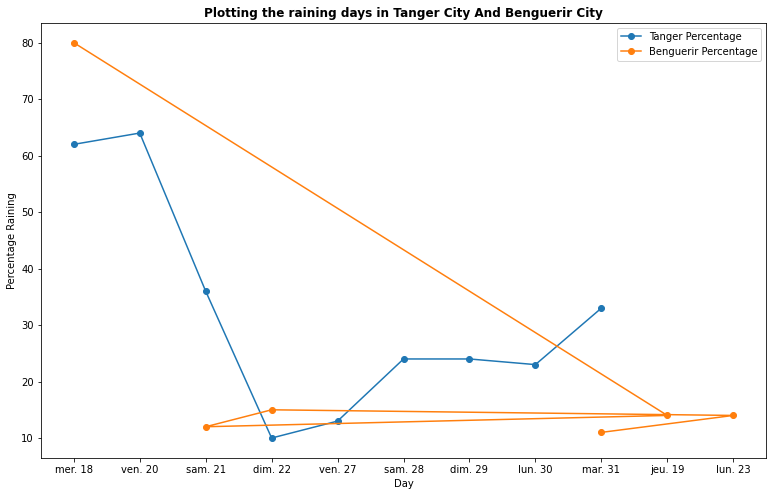

In [101]:
plt.figure(figsize = (13,8))
Day_1 = Tanger_data_possibilty_raining['Day']
Day_2 = Benguerir_data_possibilty_raining['Day']

plt.plot(Day_1,Tanger_data_possibilty_raining["Int_Percentage_Value"],marker = 'o', label = "Tanger Percentage")
plt.plot(Day_2,Benguerir_data_possibilty_raining["Int_Percentage_Value"],marker = 'o', label = "Benguerir Percentage")
plt.legend()
plt.locator_params('x',nbins = 20)
plt.title("Plotting the raining days in Tanger City And Benguerir City", fontweight='bold')
plt.xlabel('Day')
plt.ylabel('Percentage Raining')
plt.show()